### Imports

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from fetch.api_client import fetch_dataframe

from config import WORKSHEET_GID_2

### Extracting the data

Notice that the footer contains information that is irrelevant to our analysis.

In [6]:
# Gets the data
df = fetch_dataframe()
print(df.tail(10))

                                              Metro Name Created Date  \
13214                Detroit-Warren-Dearborn, MI (Metro)    2/21/2023   
13215                Detroit-Warren-Dearborn, MI (Metro)     3/1/2023   
13216                Detroit-Warren-Dearborn, MI (Metro)    3/10/2023   
13217                Detroit-Warren-Dearborn, MI (Metro)    3/17/2023   
13218                                                                   
13219                        Mktplace > Case Ops manager                
13220  Copyright (c) 2000-2023 salesforce.com, inc. A...                
13221       Confidential Information - Do Not Distribute                
13222      Generated By: Bruno Silva 3/21/2023, 10:24 AM                
13223                                            DRAIVER                

           Status Registration Complete Timestamp Training Complete Timestamp  \
13214  Background             2/21/2023, 11:38 PM                               
13215      Active               3/

So, I made a script that will cut out this part

In [7]:
def exclude_footer_info(df):
    # Turn empty strings to NaN
    df = df.replace(r'^\s*$', np.nan, regex=True)

    # Get the empty rows starting from the last row
    empty_rows = df.isna().all(axis=1).iloc[::-1]

    if not empty_rows.any():
        # If don't have any empty row returns earlier to better performance
        return df
    
    # Get the index from the first empty row (starting from the last row)
    first_empty_idx = empty_rows[empty_rows].index[0]

    df_without_footer = df.iloc[:first_empty_idx].copy()

    return df_without_footer

And now we have the pure data

In [8]:
df = exclude_footer_info(df)
df.tail(5)

C:\Users\gabri\AppData\Local\Temp\ipykernel_7576\2941241454.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace(r'^\s*$', np.nan, regex=True)


,Metro Name,Created Date,Status,Registration Complete Timestamp,Training Complete Timestamp,Last Login,Last Trip,Last SMS,Last Trip Offer,Number of Rides,Last Background Run,First Trip,Mailing Country
13213,"Detroit-Warren-Dearborn, MI (Metro)",1/11/2023,Active,"1/11/2023, 12:16 PM",NaN,NaN,NaN,"1/11/2023, 3:16 PM",NaN,0.0,"1/11/2023, 3:15 PM",NaN,US
13214,"Detroit-Warren-Dearborn, MI (Metro)",2/21/2023,Background,"2/21/2023, 11:38 PM",NaN,"2/21/2023, 11:38 PM",NaN,NaN,NaN,0.0,NaN,NaN,US
13215,"Detroit-Warren-Dearborn, MI (Metro)",3/1/2023,Active,"3/1/2023, 3:24 AM",NaN,"3/1/2023, 3:24 AM",NaN,"3/9/2023, 1:09 PM",NaN,0.0,"3/9/2023, 1:08 PM",NaN,US
13216,"Detroit-Warren-Dearborn, MI (Metro)",3/10/2023,Training,"3/11/2023, 3:34 AM","3/11/2023, 10:33 AM","3/20/2023, 9:56 PM",NaN,NaN,NaN,0.0,NaN,NaN,US
13217,"Detroit-Warren-Dearborn, MI (Metro)",3/17/2023,Active,"3/17/2023, 2:20 AM","3/17/2023, 3:07 AM","3/18/2023, 12:17 AM",NaN,"3/18/2023, 5:29 AM","3/20/2023, 1:30 PM",0.0,"3/18/2023, 5:28 AM",NaN,US


## Data Exploration

Checking the basic information

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13218 entries, 0 to 13217
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Metro Name                       13218 non-null  object 
 1   Created Date                     13218 non-null  object 
 2   Status                           13218 non-null  object 
 3   Registration Complete Timestamp  13162 non-null  object 
 4   Training Complete Timestamp      4230 non-null   object 
 5   Last Login                       10651 non-null  object 
 6   Last Trip                        865 non-null    object 
 7   Last SMS                         9762 non-null   object 
 8   Last Trip Offer                  5473 non-null   object 
 9   Number of Rides                  13218 non-null  float64
 10  Last Background Run              7301 non-null   object 
 11  First Trip                       858 non-null    object 
 12  Mailing Country   

As you can see, all columns are currently being interpreted as objects (strings), except for the ‘Number of Rides’ column. We will fix this in the next step

Checking the status ratio of drivers

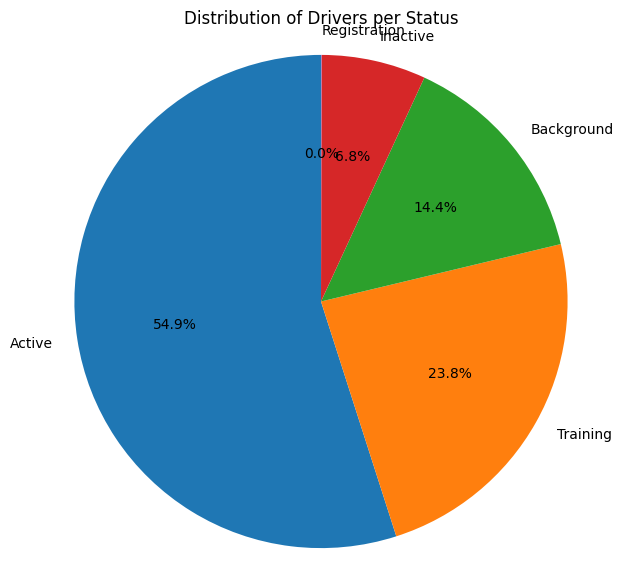

In [10]:
# Compute counts per Status
counts = df["Status"].value_counts()

# Prepare labels and sizes
labels = counts.index.tolist()
sizes  = counts.values

# Create pie chart
plt.figure(figsize=(7, 7))
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90
)
plt.title('Distribution of Drivers per Status')
plt.axis('equal')  # Ensure pie is drawn as a circle
plt.show()

In [11]:
df.select_dtypes('object').describe().transpose()

,count,unique,top,freq
Metro Name,13218,594,"Chicago-Naperville-Elgin, IL-IN-WI (Metro)",794
Created Date,13218,172,3/2/2023,542
Status,13218,5,Active,7262
Registration Complete Timestamp,13162,12163,"3/2/2023, 4:15 PM",7
Training Complete Timestamp,4230,4125,"3/2/2023, 5:14 PM",3
Last Login,10651,8455,"3/21/2023, 10:24 AM",60
Last Trip,865,845,"3/20/2023, 3:59 PM",3
Last SMS,9762,4777,"3/20/2023, 4:37 PM",270
Last Trip Offer,5473,1772,"3/20/2023, 4:44 PM",42
Last Background Run,7301,6608,"3/14/2023, 12:45 PM",7


Here we notice that the place in where have more drivers related, is the Chigago-Naperville.

## Cleaning and Tranformation

In [12]:
columns_to_datetime = ['Training Complete Timestamp','Registration Complete Timestamp', 'Last Login', 'Last Trip', 'Last SMS', 'Last Trip Offer', 'Last Background Run', 'First Trip']

df['Number of Rides'] = df['Number of Rides'].astype(int)
df['Created Date'] = pd.to_datetime(df['Created Date'], format='%m/%d/%Y')

for col in columns_to_datetime:
  df[col] = pd.to_datetime(df[col], format='%m/%d/%Y, %I:%M %p')

As we already seen before, we could see that both the datetimes columns and the Number of Rides column were being treated as objects (strings). So I changed this for better handling.

In [13]:
df.dtypes

Metro Name                                 object
Created Date                       datetime64[ns]
Status                                     object
Registration Complete Timestamp    datetime64[ns]
Training Complete Timestamp        datetime64[ns]
Last Login                         datetime64[ns]
Last Trip                          datetime64[ns]
Last SMS                           datetime64[ns]
Last Trip Offer                    datetime64[ns]
Number of Rides                             int64
Last Background Run                datetime64[ns]
First Trip                         datetime64[ns]
Mailing Country                            object
dtype: object

Compute and sort missing percentages

In [14]:
missing_pct = round(df.isna().mean().sort_values(ascending=False) * 100, 2)
missing_pct

First Trip                         93.51
Last Trip                          93.46
Training Complete Timestamp        68.00
Last Trip Offer                    58.59
Last Background Run                44.76
Last SMS                           26.15
Last Login                         19.42
Registration Complete Timestamp     0.42
Mailing Country                     0.05
Created Date                        0.00
Status                              0.00
Metro Name                          0.00
Number of Rides                     0.00
dtype: float64

Keep only relevant columns for initial analysis (non null fields)

In [15]:
df_sd = df[["Metro Name", "Status", "Number of Rides"]].copy()


Remove suffix "(Metro)" for cleaner labels

In [16]:
df_sd["City"] = df_sd["Metro Name"].str.replace(r"\s*\(Metro\)", "", regex=True)

## Visualization

### So, now we'll see what are the most oversuplied cities.

In [17]:
# Aggregate supply (active drivers) e demand (rides)
sd = df_sd.groupby("City").agg(
    Supply=("Status", lambda s: (s=="Active").sum()),
    Demand=("Number of Rides", "sum")
)
# Compute supply/demand ratio, avoiding division by zero
sd["Ratio"] = sd["Supply"] / sd["Demand"].replace(0, 1)
# Sort by Ratio descending
overs = sd.sort_values("Ratio", ascending=False)
overs.head()

,Supply,Demand,Ratio
City,,,
"San Francisco-Oakland-Hayward, CA",93,2,46.5
"Jackson, MS",44,0,44.0
"Baton Rouge, LA",40,0,40.0
"Provo-Orem, UT",23,1,23.0
"Worcester, MA-CT",22,0,22.0


Determine common x-axis limits

In [18]:
min_ratio = sd["Ratio"].min()
max_ratio = sd["Ratio"].max() + 1

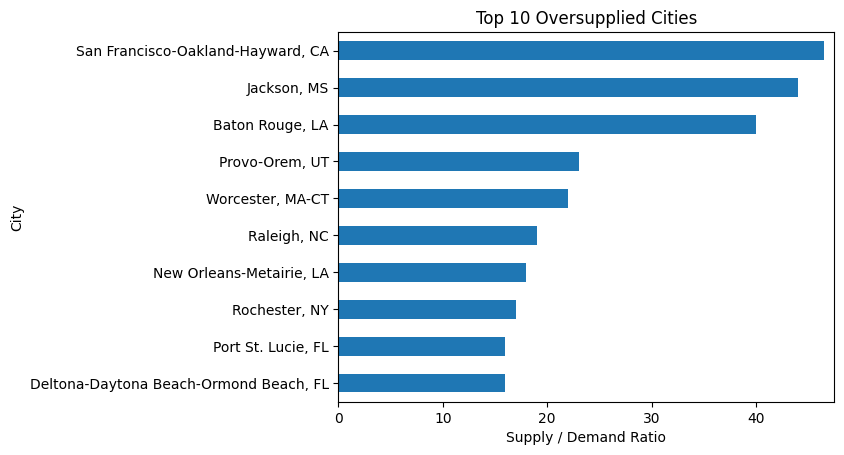

In [19]:
overs = overs.head(10)
ax1 = overs["Ratio"].plot.barh(title="Top 10 Oversupplied Cities")
ax1.set_xlabel("Supply / Demand Ratio")    # define o rótulo do eixo X
ax1.set_xlim(min_ratio, max_ratio)         # apply same scale
ax1.invert_yaxis()

#### And now we'll see the most undersplied cities

In [20]:
# Select cities with Ratio > 0 and Ratio < 1 (undersupplied)
undersupplied = sd[(sd["Ratio"] > 0) & (sd["Ratio"] < 1)].sort_values("Ratio", ascending=True)

undersupplied.head(10)

,Supply,Demand,Ratio
City,,,
"Marquette, MI (Micro)",1,59,0.016949
"Panama City, FL",1,47,0.021277
"Shelby, NC (Micro)",2,84,0.023810
"Ocean City, NJ",1,36,0.027778
"Carroll, IA (Micro)",1,34,0.029412
"Scranton--Wilkes-Barre--Hazleton, PA",15,496,0.030242
"Reading, PA",9,170,0.052941
"Grand Rapids-Wyoming, MI",28,528,0.053030
"St. Joseph, MO-KS",4,61,0.065574


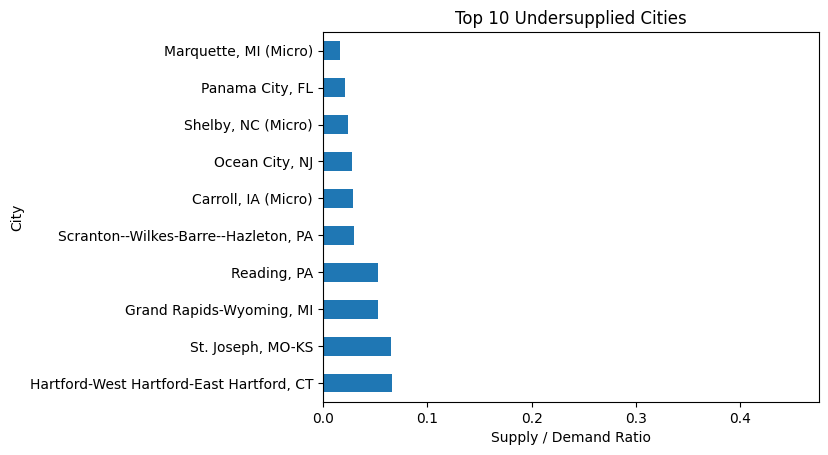

In [21]:
under = undersupplied.head(10)
ax2 = under["Ratio"].plot.barh(title="Top 10 Undersupplied Cities")
ax2.set_xlabel("Supply / Demand Ratio")    # define o rótulo do eixo X
ax2.set_xlim(min_ratio, max_ratio / 100)   # the scale is 100 times smaller
ax2.invert_yaxis()

#### Now, we'll analyse the steps to see in what step we have the most signifcant drop

In [22]:
# Create a standalone copy to work with funnel flags
df_funnel = df.copy()

# Now add your boolean flags only to the copy
df_funnel["registered"]       = df_funnel["Registration Complete Timestamp"].notna()
df_funnel["trained"]          = df_funnel["Training Complete Timestamp"].notna()
df_funnel["background_done"]  = df_funnel["Status"] == 'Background'
df_funnel["first_trip_done"]  = df_funnel["First Trip"].notna()


In [23]:
# Build funnel from df_funnel
total         = len(df_funnel)
n_registered  = df_funnel["registered"].sum()
n_trained     = df_funnel["trained"].sum()
n_background  = df_funnel["background_done"].sum()
n_first       = df_funnel["first_trip_done"].sum()


In [24]:
funnel = pd.DataFrame({
    "stage": ["created", "registered", "trained", "background", "first_trip"],
    "count": [total, n_registered, n_trained, n_background, n_first]
})

# Calculate drop between stages
funnel["next_count"] = funnel["count"].shift(-1)                         # Bring next stage count up
funnel["drop"]       = funnel["count"] - funnel["next_count"]            # Absolute drop
funnel["drop_pct"]   = round(funnel["drop"] / funnel["count"] * 100, 2)  # Percentage drop

funnel

,stage,count,next_count,drop,drop_pct
0,created,13218,13162.0,56.0,0.42
1,registered,13162,4230.0,8932.0,67.86
2,trained,4230,1900.0,2330.0,55.08
3,background,1900,858.0,1042.0,54.84
4,first_trip,858,NaN,NaN,NaN


Some Chart to be cleaner to see

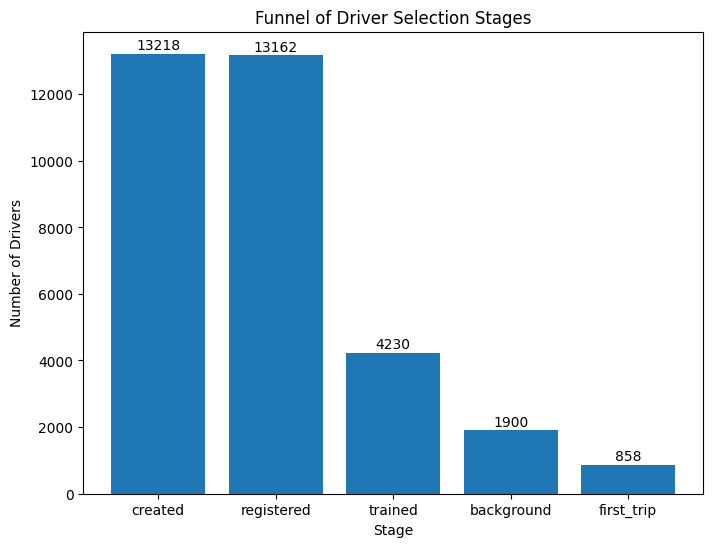

In [25]:
# Plot the funnel as a bar chart
fig, ax3 = plt.subplots(figsize=(8, 6))
ax3.bar(funnel['stage'], funnel['count'])
ax3.set_title('Funnel of Driver Selection Stages')
ax3.set_xlabel('Stage')
ax3.set_ylabel('Number of Drivers')

# Annotate each bar with its count
for i, v in enumerate(funnel['count']):
    ax3.text(i, v + total * 0.01, str(v), ha='center')

plt.show()


Here is this chart above with the drivers that are on the process

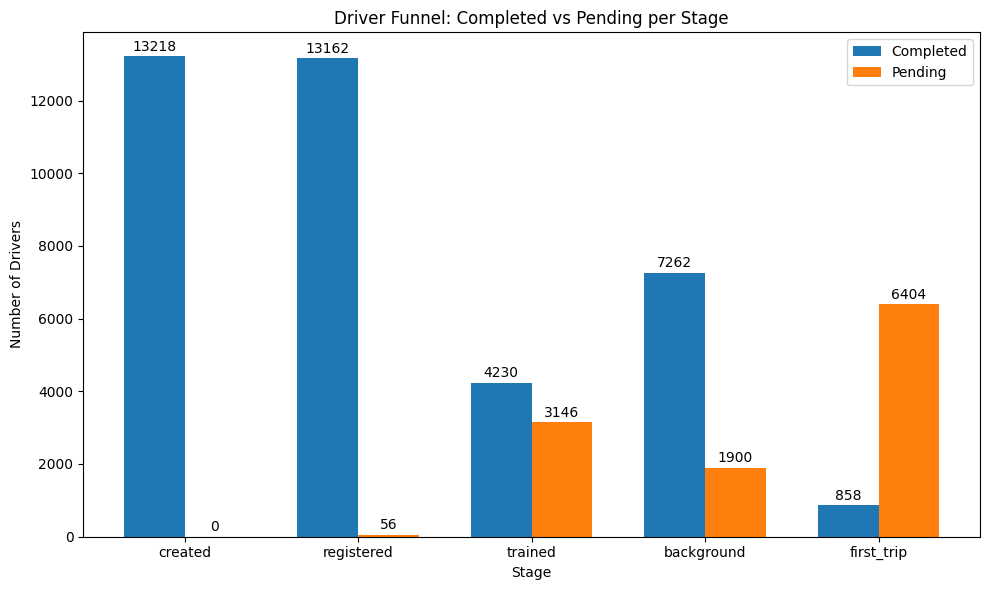

In [26]:
# Supondo que funnel['stage'] e funnel['count'] já estejam definidos
stages = funnel['stage'].tolist()
completed = np.array(funnel['count'].tolist())

# Total invited is the initial pool (registered count)
total_invited = completed[0]

total_training = len(df[df['Status'] == 'Training'])
total_active= len(df[df['Status'] == 'Active'])
total_in_background = len(df[df['Status'] == 'Background'])

# Compute pending array of same length
pending = np.zeros_like(completed)
# For the first stage, drivers not yet registered
pending[0] = total_invited - completed[0]

# For subsequent stages, difference entre estágio anterior e atual
pending[1] = completed[0] - completed[1]
pending[2] = total_training
pending[3] = total_in_background
pending[4] =  total_active - completed[-1]
completed[3] = total_active

# X positions e bar width
x = np.arange(len(stages))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
# Bars for completed stages
bars1 = ax.bar(x - width/2, completed, width, label='Completed')
# Bars for pending drivers in each stage
bars2 = ax.bar(x + width/2, pending,   width, label='Pending')

# Labels e título
ax.set_xticks(x)
ax.set_xticklabels(stages)
ax.set_xlabel('Stage')
ax.set_ylabel('Number of Drivers')
ax.set_title('Driver Funnel: Completed vs Pending per Stage')

# Annotate each bar with its height
for bar in np.concatenate([bars1, bars2]):
    h = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width()/2,
        h + total_invited * 0.005,
        int(h),
        ha='center',
        va='bottom'
    )

ax.legend()
plt.tight_layout()
plt.show()

In [27]:
df["Status"].value_counts()

Status
Active          7262
Training        3146
Background      1900
Inactive         905
Registration       5
Name: count, dtype: int64

And now we'll see the how much time as a median the drivers took, since he finish his register, until finish his training

In [28]:
# Remove drivers without had completed the training
df_filtered = df[df['Training Complete Timestamp'].notna()].copy()

# Compute time to the registration until finish the training
df_filtered['Time to Complete the Training'] = df_filtered['Training Complete Timestamp'] - df_filtered['Registration Complete Timestamp']

# Calculate median activation time per metro
activation_time = (
    df_filtered['Time to Complete the Training'].median()
)

print(f'Median time is {activation_time}')

Median time is 0 days 02:52:30


#### Here is in the worst cases

In [29]:
# Remove drivers without a had completed the training
df_filtered = df[df['Training Complete Timestamp'].notna()].copy()

# Compute time to the registration until finish the training
df_filtered['Time to Complete the Training'] = df_filtered['Training Complete Timestamp'] - df_filtered['Registration Complete Timestamp']

# Calculate median activation time per metro
activation_time = (
    df_filtered
     .groupby('Metro Name')['Time to Complete the Training']
     .median()
     .reset_index()
)

# Sort descending (from highest to lowest average time)
activation_time = activation_time.sort_values(
    by='Time to Complete the Training', 
    ascending=False
).reset_index(drop=True)

activation_time.head(10)

,Metro Name,Time to Complete the Training
0,"Richmond-Berea, KY (Micro)",13 days 08:00:00
1,"Columbus, GA-AL (Metro)",11 days 23:39:00
2,"Visalia-Porterville, CA (Metro)",11 days 16:04:00
3,"Truckee-Grass Valley, CA (Micro)",10 days 11:34:30
4,"Prineville, OR (Micro)",10 days 11:20:00
5,"Forest City, NC (Micro)",7 days 23:57:00
6,"Fernley, NV (Micro)",6 days 05:30:00
7,"Sherman-Denison, TX (Metro)",4 days 21:20:00
8,"Sioux Falls, SD (Metro)",4 days 10:09:00
9,"Martinsville, VA (Micro)",3 days 20:28:00


In [30]:
df.select_dtypes('datetime64[ns]').describe().transpose()

,count,mean,min,25%,50%,75%,max
Created Date,13218,2023-01-23 11:09:27.044938752,2022-10-01 00:00:00,2022-12-20 00:00:00,2023-02-06 00:00:00,2023-03-09 00:00:00,2023-03-21 00:00:00
Registration Complete Timestamp,13162,2023-01-26 17:21:01.385807616,2022-10-01 02:25:00,2022-12-27 18:41:00,2023-02-10 08:42:30,2023-03-10 23:18:00,2023-03-21 10:23:00
Training Complete Timestamp,4230,2023-01-30 23:04:13.304964608,2022-10-01 02:54:00,2023-01-06 09:00:15,2023-02-17 18:57:30,2023-03-11 21:27:15,2023-03-21 10:21:00
Last Login,10651,2023-02-23 16:44:41.477795584,2022-10-01 18:31:00,2023-02-10 12:39:00,2023-03-13 16:21:00,2023-03-20 10:15:00,2023-03-21 10:24:00
Last Trip,865,2023-02-09 08:10:46.682080768,2022-10-12 23:04:00,2023-01-17 19:07:00,2023-02-22 15:49:00,2023-03-15 16:09:00,2023-03-21 10:12:00
Last SMS,9762,2023-02-18 01:24:11.604179456,2022-10-01 12:44:00,2023-01-31 19:00:00,2023-03-08 02:39:00,2023-03-16 10:02:15,2023-03-21 10:21:00
Last Trip Offer,5473,2023-02-28 14:00:55.077653760,2022-10-08 09:06:00,2023-02-20 07:54:00,2023-03-17 01:47:00,2023-03-20 13:46:00,2023-03-20 23:56:00
Last Background Run,7301,2023-01-15 21:47:13.822764032,2022-10-01 20:14:00,2022-12-09 12:10:00,2023-01-23 06:41:00,2023-03-03 12:02:00,2023-03-21 10:13:00
First Trip,858,2023-01-13 00:59:55.944055808,2022-10-06 17:37:00,2022-12-11 12:27:00,2023-01-19 12:53:00,2023-02-16 10:34:45,2023-03-21 10:00:00


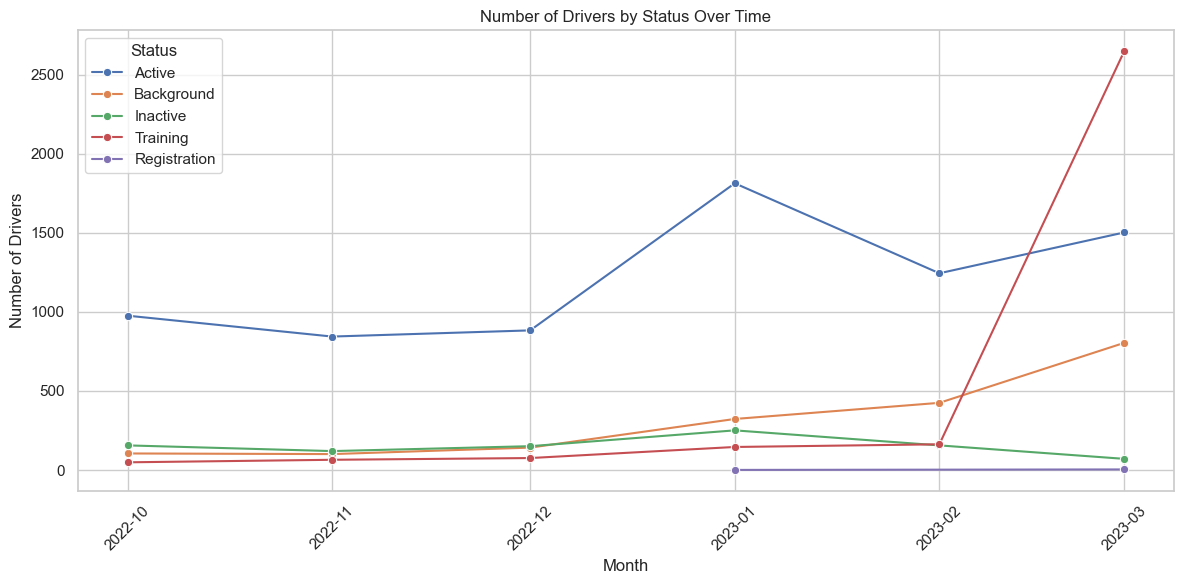

In [31]:
# Extract month (as timestamp) for grouping
df['month'] = df['Created Date'].dt.to_period('M').dt.to_timestamp()

# Group by month e status, contar motoristas
status_month = (
    df
    .groupby(['month', 'Status'])
    .size()
    .reset_index(name='count')
)

# Plot with seaborn
sns.set_theme(style='whitegrid')
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=status_month,
    x='month',
    y='count',
    hue='Status',
    marker='o'
)
plt.title('Number of Drivers by Status Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Drivers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

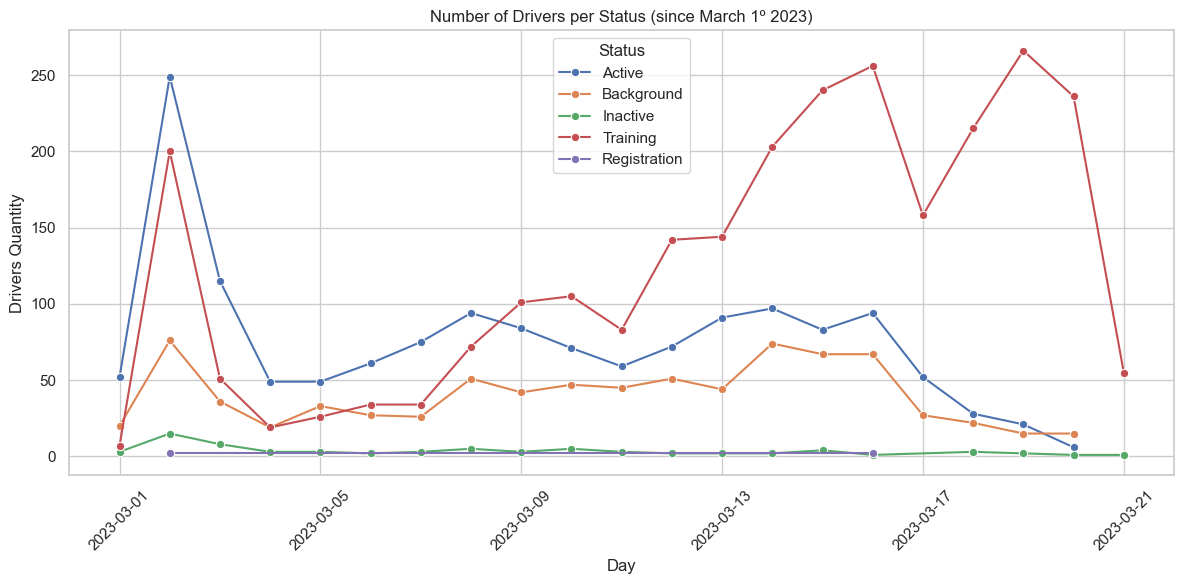

In [35]:
# Convert to daily period then back to timestamp
df['days'] = df['Created Date'].dt.to_period('D').dt.to_timestamp()

# Create Timestamp for March 1st, 2023
first_march_2023 = pd.Timestamp(year=2023, month=3, day=1)

# Select rows with days >= first_march_2023
df_mar_onwards = df.loc[df['days'] >= first_march_2023].copy()

# Group and count per Status per day
status_mar = (
    df_mar_onwards
    .groupby(['days', 'Status'])
    .size()
    .reset_index(name='count')
)

# 5) Plot with seaborn
sns.set_theme(style='whitegrid')
plt.figure(figsize=(12, 6))
# Lineplot of counts over days, colored by Status
sns.lineplot(
    data=status_mar,
    x='days',
    y='count',
    hue='Status',
    marker='o'
)
plt.title('Number of Drivers per Status (since March 1º 2023)')
plt.xlabel('Day')
plt.ylabel('Drivers Quantity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Create Timestamps for the period boundaries
start = pd.Timestamp('2023-03-13')
end   = pd.Timestamp('2023-03-21')

# Filter rows where Status is Training and days in the given range
mask = (
    (status_mar['Status'] == 'Training') &
    (status_mar['days']   >= start) &
    (status_mar['days']   <= end)
)

# 3) Extract only the lines
training_period = status_mar.loc[mask]

# Sum the counts over the filtered period
total_training = training_period['count'].sum()

print(f'Total drivers in Training from {start.date()} to {end.date()}:', total_training)

Total drivers in Training from 2023-03-13 to 2023-03-21: 1773


In [47]:
qtt_training = len(df[df['Status'] == 'Training'])
print(f'Drivers on training that started in the last 8 days: {round(total_training / qtt_training * 100, 2)}%')

Drivers on training that started in the last 8 days: 56.36%
